In [4]:
import os
from PIL import Image
import numpy as np

def analyze_dataset(images_folder, groundtruth_folder):
    # Get file names
    image_files = sorted(os.listdir(images_folder))
    gt_files = sorted(os.listdir(groundtruth_folder))
    
    assert len(image_files) == len(gt_files), "Mismatch in the number of images and ground truths."
    
    print(f"Number of files: {len(image_files)}")
    
    sizes = []
    unique_values = set()
    for img_file, gt_file in zip(image_files, gt_files):
        # Ensure corresponding files match
        assert img_file == gt_file, f"Mismatch in file names: {img_file} vs {gt_file}"
        
        # Analyze image
        img = Image.open(os.path.join(images_folder, img_file))
        gt = Image.open(os.path.join(groundtruth_folder, gt_file))
        
        # Check image sizes
        assert img.size == gt.size, f"Size mismatch for {img_file}: {img.size} vs {gt.size}"
        sizes.append(img.size)
        
        # Collect unique values in ground truth
        unique_values.update(np.unique(np.array(gt)))
    
    # Print analysis results
    unique_sizes = set(sizes)
    print(f"Unique image sizes: {unique_sizes}")
    if len(unique_sizes) == 1:
        print(f"All images are {unique_sizes.pop()}")
    else:
        print("Images have varying sizes.")
        
    print(f"Unique values in masks: {sorted(unique_values)}")

# Analyze the train and validation folders
analyze_dataset("epfl_augmented/train/images", "epfl_augmented/train/groundtruth")
analyze_dataset("epfl_augmented/validation/images", "epfl_augmented/validation/groundtruth")

Number of files: 2700
Unique image sizes: {(384, 384)}
All images are (384, 384)
Unique values in masks: [np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9), np.uint8(10), np.uint8(11), np.uint8(12), np.uint8(13), np.uint8(14), np.uint8(15), np.uint8(16), np.uint8(17), np.uint8(18), np.uint8(19), np.uint8(20), np.uint8(21), np.uint8(22), np.uint8(23), np.uint8(24), np.uint8(25), np.uint8(26), np.uint8(27), np.uint8(28), np.uint8(29), np.uint8(30), np.uint8(31), np.uint8(32), np.uint8(33), np.uint8(34), np.uint8(35), np.uint8(36), np.uint8(37), np.uint8(38), np.uint8(39), np.uint8(40), np.uint8(41), np.uint8(42), np.uint8(43), np.uint8(44), np.uint8(45), np.uint8(46), np.uint8(47), np.uint8(48), np.uint8(49), np.uint8(50), np.uint8(51), np.uint8(52), np.uint8(53), np.uint8(54), np.uint8(55), np.uint8(56), np.uint8(57), np.uint8(58), np.uint8(59), np.uint8(60), np.uint8(61), np.uint8(62), np.uint8(63), np.uint8

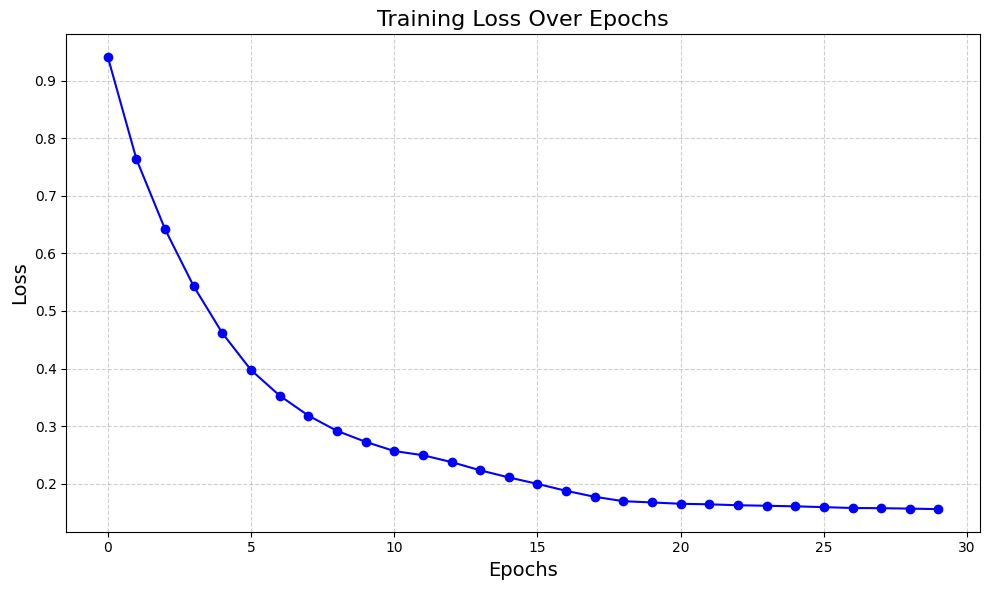

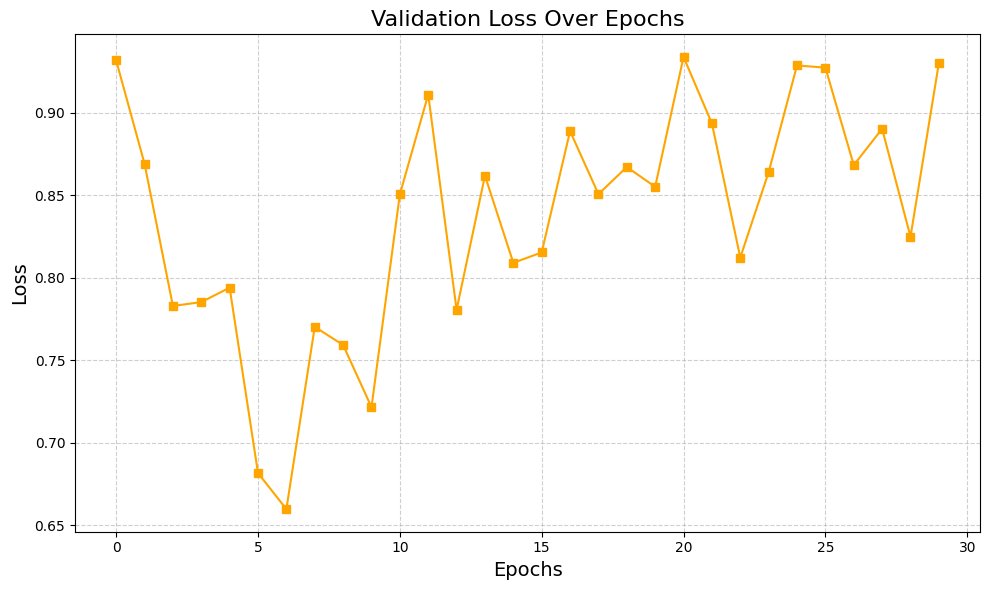

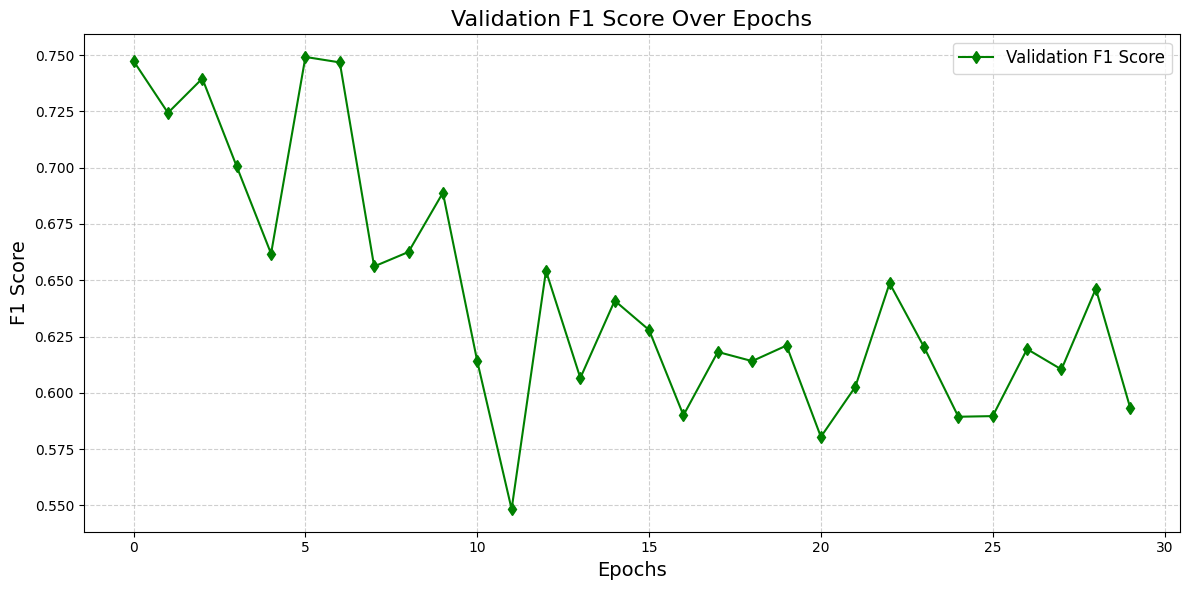

In [8]:
import json
import matplotlib.pyplot as plt

# Load the JSON file containing the metrics
json_file_path = "training_metrics.json"
with open(json_file_path, "r") as f:
    metrics = json.load(f)

# Extract data
train_losses = metrics["train_losses"]
val_losses = metrics["val_losses"]
val_f1_scores = metrics["val_f1_scores"]

# Plot Training Loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, linestyle='-', marker='o', label='Training Loss', color='blue')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training Loss Over Epochs', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("training_loss_plot.png")
plt.show()

# Plot Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(val_losses, linestyle='-', marker='s', label='Validation Loss', color='orange')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Validation Loss Over Epochs', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("validation_loss_plot.png")
plt.show()

# Plot Validation F1 Scores
plt.figure(figsize=(12, 6))
plt.plot(val_f1_scores, label='Validation F1 Score', linestyle='-', marker='d', color='green')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.title('Validation F1 Score Over Epochs', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("f1_score_plot.png")
plt.show()